In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import openturns as ot 
import copulogram as cp
import matplotlib.pyplot as plt
import openturns.viewer as otv

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

# Global sensitivity analysis - Ishigami analytical problem 

This notebook merges the resources from the two following OpenTURNS tutorials: 
- https://openturns.github.io/openturns/latest/auto_reliability_sensitivity/sensitivity_analysis/plot_sensitivity_sobol.html
- https://openturns.github.io/openturns/latest/auto_reliability_sensitivity/sensitivity_analysis/plot_hsic_estimators_ishigami.html

In [3]:
from openturns.usecases import ishigami_function
im = ishigami_function.IshigamiModel()
# Ishigami function
im.model

class=FunctionImplementation name=Unnamed description=[X1,X2,X3,y] evaluationImplementation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[X1,X2,X3,a,b,y] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] parameters positions=[3,4] parameters=class=PointWithDescription name=Unnamed dimension=2 description=[a,b] values=[7,0.1] input positions=[0,1,2] gradientImplementation=class=ParametricGradient evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[X1,X2,X3,a,b,y] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] parameters positions=[3,4] parameters=class=PointWithDescription name=Unnamed dimension=2 description=[a,b] values=[7,0.1] input positions=[0,1,2] hessianImplementation=class=ParametricHessian evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[X1,X2,X3,a,b,y] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[X1,X2,X3,a,b] outputVariablesNames=[y0] formulas=[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)] parameters positions=[3,4] parameters=class=PointWithDescription name=Unnamed dimension=2 description=[a,b] values=[7,0.1] input positions=[0,1,2]

In [4]:
g=ot.SymbolicFunction(['x1', 'x2', 'x3'], ['sin(x1) + 7.0 * sin(x2)^2 + 0.1 * x3^4 * sin(x1)'])
X=ot.ComposedDistribution([ot.Uniform(-np.pi, np.pi)] * 3)
size=1000
# Generate samples and evaluate their images
sie=ot.SobolIndicesExperiment(im.distributionX, size)
input_design=sie.generate()
output_design=im.model(input_design)
# Four estimators are available in OT: Saltelli, Martinez, Jansen, and Mauntz-Kucherenko
SA= ot.JansenSensitivityAlgorithm(input_design, output_design, size)
sobol_first_order=SA.getFirstOrderIndices()
sobol_tolal=SA.getTotalOrderIndices()

In [5]:
# Input joint distribution
im.distributionX

Index,Variable,Distribution
0,X1,"Uniform(a = -3.14159, b = 3.14159)"
1,X2,"Uniform(a = -3.14159, b = 3.14159)"
2,X3,"Uniform(a = -3.14159, b = 3.14159)"


In [6]:
size = 1000
X = im.distributionX.getSample(size)
Y = im.model(X)

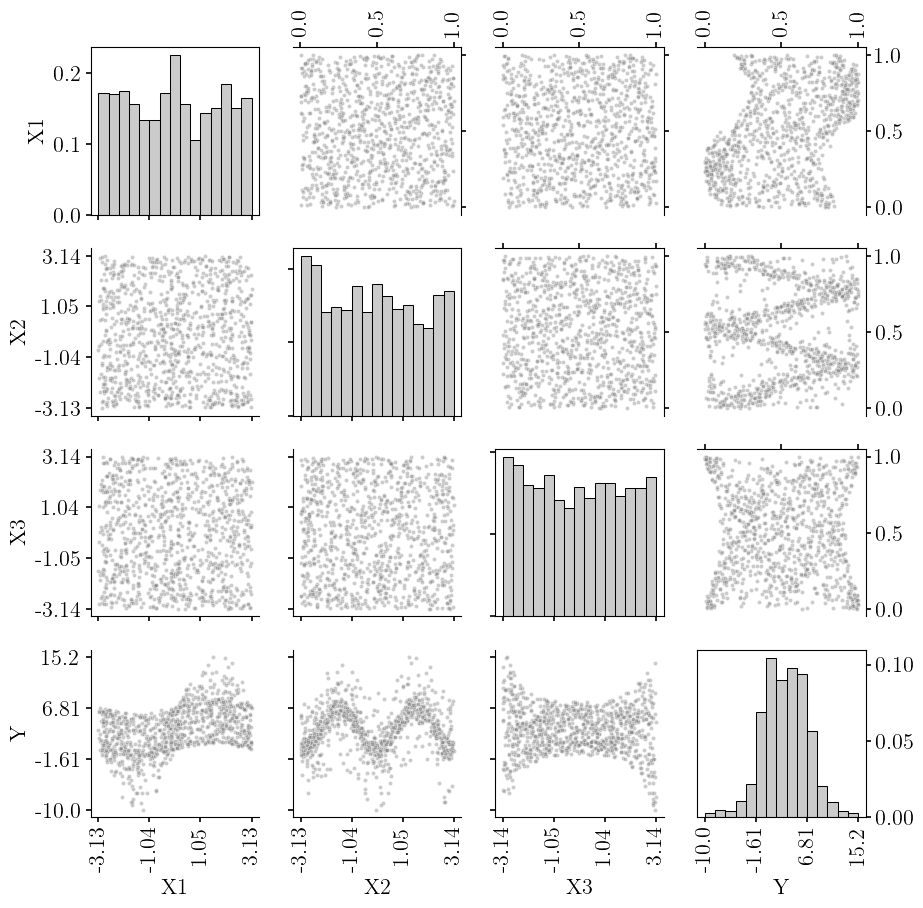

In [7]:
data = pd.DataFrame(np.array(X[:size]), columns=list(X.getDescription()))
data['Y'] = np.array(Y[:size])
copulogram = cp.Copulogram(data)
copulogram.draw(color='C7', marker='.', alpha=0.4);

## Sobol' indices

In [8]:
sie = ot.SobolIndicesExperiment(im.distributionX, size)
inputDesign = sie.generate()
input_names = im.distributionX.getDescription()
inputDesign.setDescription(input_names)
inputDesign.getSize()
outputDesign = im.model(inputDesign)

In [9]:
# Four estimators are available in OT: Saltelli, Martinez, Jansen, and Mauntz-Kucherenko
sensitivityAnalysis = ot.JansenSensitivityAlgorithm(inputDesign, outputDesign, size)
sobol_first_order = sensitivityAnalysis.getFirstOrderIndices()
sobol_tolal = sensitivityAnalysis.getTotalOrderIndices()

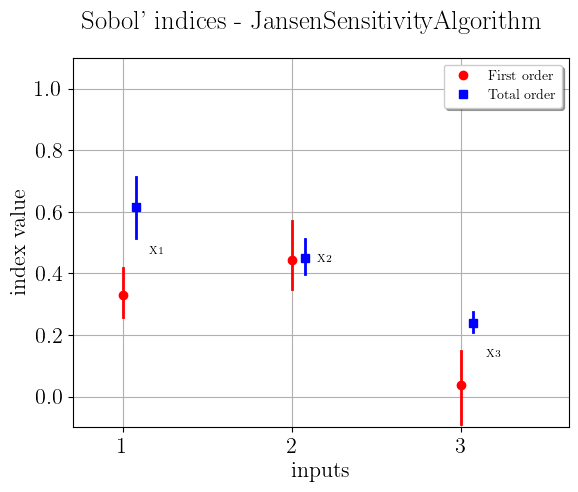

In [10]:
graph = sensitivityAnalysis.draw()
view = otv.View(graph)

## HSIC 

In [11]:
covarianceModelCollection = []
for i in range(X.getDimension()):
    Xi = X.getMarginal(i)
    inputCovariance = ot.SquaredExponential(1)
    inputCovariance.setScale(Xi.computeStandardDeviation())
    covarianceModelCollection.append(inputCovariance)
outputCovariance = ot.SquaredExponential(1)
outputCovariance.setScale(Y.computeStandardDeviation())
covarianceModelCollection.append(outputCovariance)

In [12]:
globHSIC = ot.HSICEstimatorGlobalSensitivity(
    covarianceModelCollection, X, Y, ot.HSICUStat()
)
HSICIndices = globHSIC.getHSICIndices()
R2HSICIndices = globHSIC.getR2HSICIndices()
pvals_permutation = globHSIC.getPValuesPermutation()
print("HSIC Indices: \t\t", HSICIndices)
print("R2-HSIC Indices: \t", R2HSICIndices)
print("p-value (permutation): \t", pvals_permutation)

HSIC Indices: 		 [0.0123829,0.000618006,0.00233464]
R2-HSIC Indices: 	 [0.145386,0.00726264,0.0270826]
p-value (permutation): 	 [0,0.00990099,0]


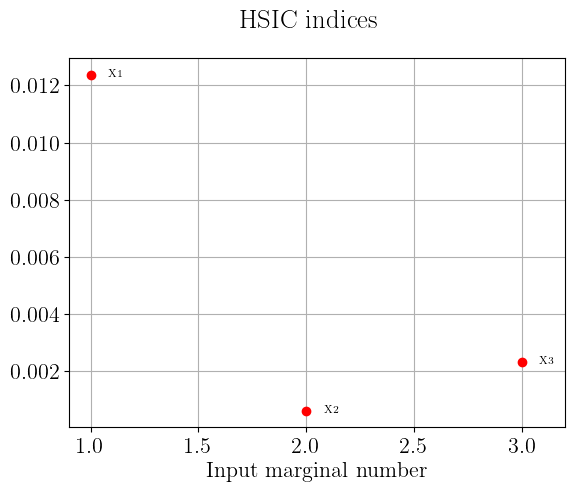

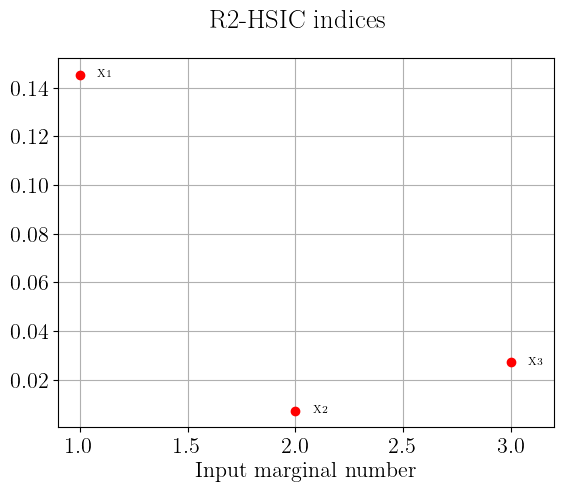

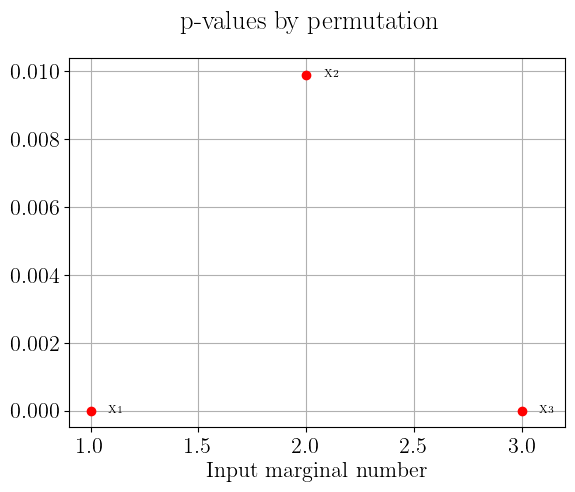

In [13]:
graph1 = globHSIC.drawHSICIndices()
view1 = otv.View(graph1)

graph2 = globHSIC.drawR2HSICIndices()
view2 = otv.View(graph2)

graph3 = globHSIC.drawPValuesPermutation()
view3 = otv.View(graph3)